IMPORTS


In [43]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import seaborn as sns

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ABRINDO O DATA SET

In [44]:
dados = pd.read_excel('/content/dataset bee.xlsx')

VERIFICANDO E DESCREVENDO OS DADOS

In [45]:
# visualizar os primeiros registros
dados.head()

,Nome,Area,Data de execução,Custo,Saving
0,1,Finanças,2024-04-01,123485.00,482747.9
1,2,Marketing,2024-05-08,234384.90,657594.0
2,3,TI,2024-02-13,23456.89,758859.0
3,4,Vendas,2024-07-15,34789.87,783894.0
4,5,Data,2024-01-24,564849.37,387859.0


In [46]:
#visualizar os ultimos registros
dados.tail()

,Nome,Area,Data de execução,Custo,Saving
9,10,Produção,2024-03-04,67959.00,743123.43
10,11,Finanças,2024-05-02,2000.56,453453.54
11,12,TiI,2024-09-01,13533.00,324854.85
12,13,RH,2024-10-09,64595.00,454744.99
13,14,Data,2024-06-19,38859.22,367858.00


In [47]:
# estatisticas descritivas dos atributos
dados.describe()

,Nome,Data de execução,Custo,Saving
count,14.0000,14,14.000000,14.000000
mean,7.5000,2024-05-11 15:25:42.857142784,305766.399286,551771.897857
min,1.0000,2024-01-24 00:00:00,2000.560000,324854.850000
25%,4.2500,2024-03-17 00:00:00,35807.207500,380662.675000
50%,7.5000,2024-05-05 00:00:00,95722.000000,468746.445000
75%,10.7500,2024-06-18 12:00:00,600472.915000,744122.100000
max,14.0000,2024-10-09 00:00:00,849489.000000,839349.990000
std,4.1833,NaN,345527.791426,190579.261298


In [48]:
#colunas do dataset
dados.columns

Index(['Nome', 'Area', 'Data de execução ', 'Custo ', 'Saving'], dtype='object')

In [49]:
#tamanho do conjunto de dados
dados.shape

(14, 5)

**Correlation matrix and scatter plots**


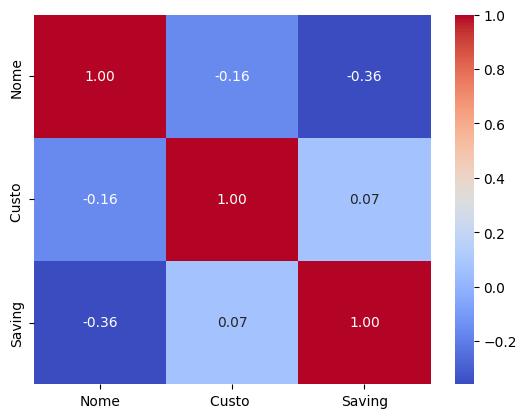

In [50]:
corr_matrix = dados[['Nome', 'Custo ', 'Saving']].corr()
corr_matrix
# Gerando um heatmap com seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

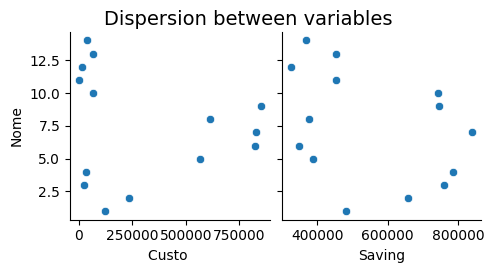

In [51]:
Bax = sns.pairplot(dados, y_vars='Nome', x_vars=['Custo ', 'Saving'])
Bax.fig.suptitle('Dispersion between variables', fontsize=14, y=1.05)
Bax

SEPARANDO DADOS

In [52]:
## Separação dos dados de entrada (FEATURES) e dados de saída (TARGET)
# X maiúsculo ----> features / variáveis independentes
X = dados[['Custo ', 'Saving']]

In [53]:
# y minúsculo ----> target / variável dependente
y = dados[['Nome']]

In [54]:
#visualizando os tres primeiros e tres ultimos dados de X
X.values

array([[123485.  , 482747.9 ],
       [234384.9 , 657594.  ],
       [ 23456.89, 758859.  ],
       [ 34789.87, 783894.  ],
       [564849.37, 387859.  ],
       [823384.45, 347748.98],
       [827595.9 , 839349.99],
       [612347.43, 378263.9 ],
       [849489.  , 744454.99],
       [ 67959.  , 743123.43],
       [  2000.56, 453453.54],
       [ 13533.  , 324854.85],
       [ 64595.  , 454744.99],
       [ 38859.22, 367858.  ]])

In [55]:
#visualizando os tres primeiros e tres ultimos dados de y
y.values

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

CREATING KNN MODEL AND LINEAR REGRESSION

In [56]:
knn_model = KNeighborsClassifier()

In [57]:
lr_model = LinearRegression()

CREATING SEPARATIONS FOR MODEL TRAINING


In [58]:
# Separação de dados de treino e teste
# X_treino, y_treino ----> para treinar o modelo com método .fit
# X_teste ----> para gerar as previsões com método .predict
# y_teste ----> para avaliar as previsões

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
X.shape

(14, 2)

In [60]:
y.shape

(14, 1)

In [61]:
X_train.shape

(9, 2)

In [62]:
X_test.shape

(5, 2)

In [63]:
y_train.shape

(9, 1)

In [64]:
y_test.shape

(5, 1)

MODELS TRAINING

In [65]:
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LinearRegression()

TESTING THE MODELS' SUCCESS RATE

KNN

In [66]:
y_predict_knn = knn_model.predict(X_test)
y_predict_knn

array([2, 2, 2, 2, 2])

In [67]:
#Cálculo do MSE (Erro Quadrático Médio)
MSE_2 = mean_squared_error(y_test, y_predict_knn)
#Cálculo do RMSE (Raiz do Erro Quadrático Médio)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_knn))
#Cálculo do R² (Coeficiente de Determinação)
R2_2 = r2_score(y_test, y_predict_knn)

#Criação de um DataFrame com as métricas
pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['KNN'])

,KNN
MSE,60.400000
RMSE,7.771744
R²,-2.106996


LINEAR REGRESSION

In [70]:
y_predict_lr = lr_model.predict(X_test)
y_predict_lr

array([[ 5.1602739 ],
       [ 9.5384107 ],
       [ 7.97607036],
       [ 8.2133425 ],
       [10.11435016]])

In [71]:
MSE_2 = mean_squared_error(y_test, y_predict_lr)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_lr))
R2_2 = r2_score(y_test, y_predict_lr)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['LINEAR REGRESSION'])

,LINEAR REGRESSION
MSE,23.597579
RMSE,4.857734
R²,-0.213867


SET CODE FOR INCREASED USER EXECUTION SPEED


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

y_predict_knn = knn_model.predict(X_test)
y_predict_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [73]:
MSE_2 = mean_squared_error(y_test, y_predict_knn)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_knn))
R2_2 = r2_score(y_test, y_predict_knn)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['KNN'])

,KNN
MSE,30.200000
RMSE,5.495453
R²,-0.424528


In [74]:
MSE_2 = mean_squared_error(y_test, y_predict_lr)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_lr))
R2_2 = r2_score(y_test, y_predict_lr)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['LINEAR REGRESSION'])

,LINEAR REGRESSION
MSE,29.016532
RMSE,5.386700
R²,-0.368704
